# Match Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Cleaning and Exploration

In [2]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]

In [3]:
matches.shape

(756, 14)

In [4]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

## Taking in consideration and RR VS MI matches

In [5]:
RM =matches[np.logical_or(np.logical_and(matches['team1']=='Mumbai Indians',matches['team2']=='Rajasthan Royals'),
                            np.logical_and(matches['team2']=='Mumbai Indians',matches['team1']=='Rajasthan Royals'))]

In [6]:
RM.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
86,2008,Mumbai,2008-05-07,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,7,A Nehra,Dr DY Patil Sports Academy
113,2008,Jaipur,2008-05-26,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,5,Sohail Tanvir,Sawai Mansingh Stadium
160,2009,Durban,2009-05-14,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Rajasthan Royals,2,0,SK Warne,Kingsmead
176,2010,Mumbai,2010-03-13,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Mumbai Indians,4,0,YK Pathan,Brabourne Stadium
219,2010,Jaipur,2010-04-11,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Mumbai Indians,37,0,SR Tendulkar,Sawai Mansingh Stadium


In [7]:
RM.shape

(20, 14)

In [8]:
RM.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2018, 2019],
      dtype=int64)

In [9]:
RM.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [10]:
RM.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,20.0,10.2,21.140134,0.0,0.0,0.0,9.5,87.0
win_by_wickets,20.0,3.7,3.540740,0.0,0.0,4.0,7.0,10.0


## HEAD TO HEAD

Text(0.5, 1.0, 'MI VS RR-head to head')

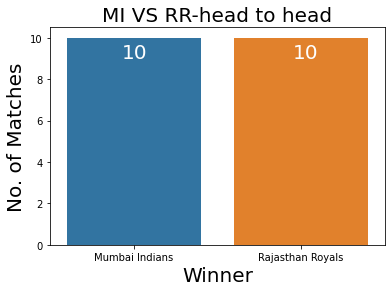

In [11]:
sns.countplot(RM["winner"])
plt.text(-0.07,9,str(RM['winner'].value_counts()['Mumbai Indians']),size=20,color='white')
plt.text(0.95,9,str(RM['winner'].value_counts()['Rajasthan Royals']),size=20,color='white')
plt.xlabel('Winner',fontsize=20)
plt.ylabel('No. of Matches',fontsize=20)
plt.title('MI VS RR-head to head',fontsize = 20)

In [12]:
Season_wise_Match_Winner = pd.DataFrame(RM.groupby(["season","winner"])["winner"].count())

Season_wise_Match_Winner.columns = ["winner count"]

print("Season wise winner of matches between RR VS MI :")
Season_wise_Match_Winner

Season wise winner of matches between RR VS MI :


winner count
season winner                        
2008   Mumbai Indians               1
       Rajasthan Royals             1
2009   Rajasthan Royals             1
2010   Mumbai Indians               2
2011   Rajasthan Royals             2
2012   Mumbai Indians               2
2013   Mumbai Indians               2
       Rajasthan Royals             1
2014   Mumbai Indians               2
2015   Mumbai Indians               1
       Rajasthan Royals             1
2018   Rajasthan Royals             2
2019   Rajasthan Royals             2

## Winning Percentage

In [13]:
Winning_Percentage = RM['winner'].value_counts()/len(RM['winner'])

In [14]:
print("MI winning percentage against RR(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("RR winning percentage against MI(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

MI winning percentage against RR(overall) : 50%
RR winning percentage against MI(overall) : 50%


## Performance Analysis

In [15]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [16]:
performance("Mumbai Indians",RM)

Number of times given team win while defending : 6
Number of times given team win while chasing   : 4

Average runs by which a given team wins while defending  :  19.0
Average wickets by which a given team wins while chasing :  6.0


In [17]:
performance("Rajasthan Royals",RM)

Number of times given team win while defending : 2
Number of times given team win while chasing   : 8

Average runs by which a given team wins while defending  :  44.0
Average wickets by which a given team wins while chasing :  6.0


## Toss Analysis

In [18]:
Toss_Decision = pd.DataFrame(RM.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision

Toss winner decision :


toss_decision
toss_winner      toss_decision               
Mumbai Indians   bat                        5
                 field                      2
Rajasthan Royals bat                        4
                 field                      9

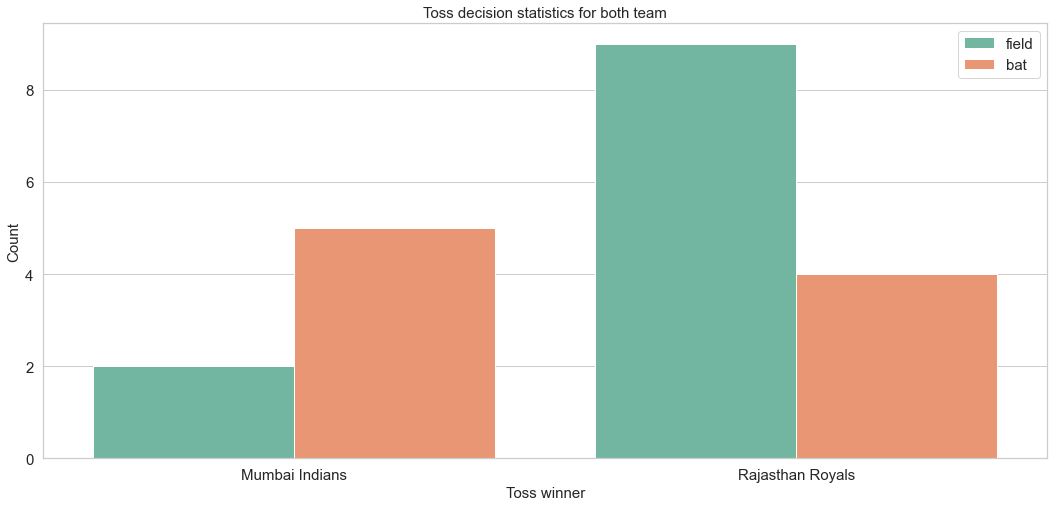

In [19]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(RM['toss_winner'],palette='Set2',hue=RM['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [20]:
Toss_Decision_based_Winner = pd.DataFrame(RM.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner      toss_decision winner                  
Mumbai Indians   bat           Mumbai Indians         2
                               Rajasthan Royals       3
                 field         Mumbai Indians         2
Rajasthan Royals bat           Mumbai Indians         2
                               Rajasthan Royals       2
                 field         Mumbai Indians         4
                               Rajasthan Royals       5

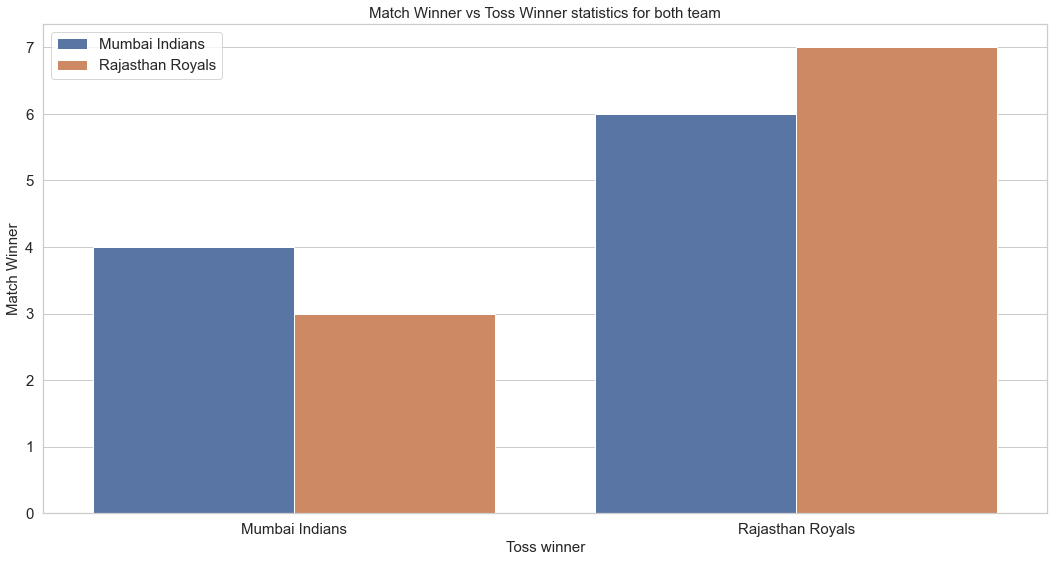

In [21]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(RM['toss_winner'],hue=RM['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

### Toss Decision based Analysis of both the teams seperately :

In [22]:
MI = RM[RM["toss_winner"]=="Mumbai Indians"]
RR = RM[RM["toss_winner"]=="Rajasthan Royals"]

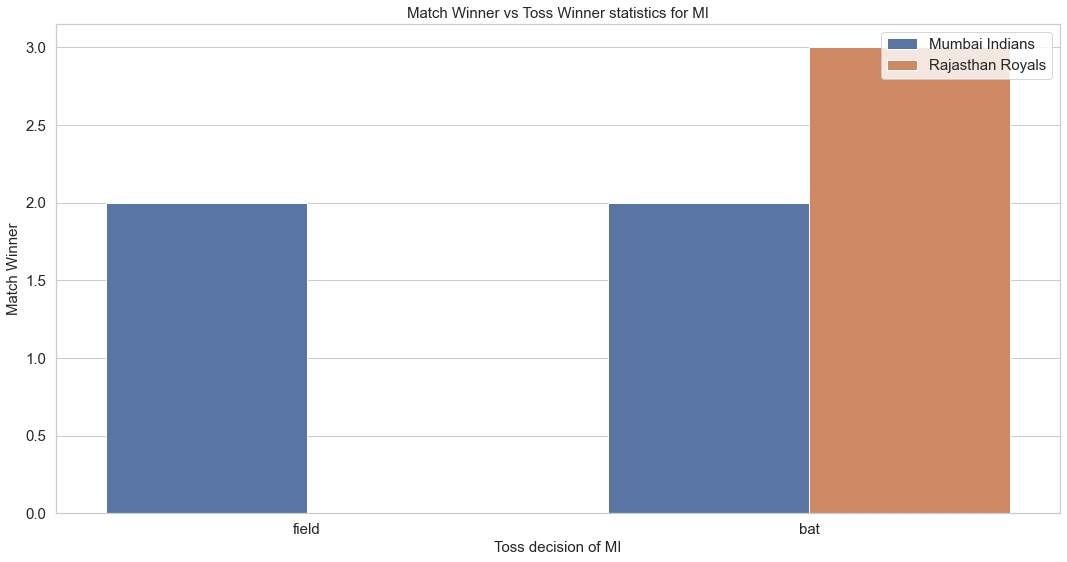

In [23]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(MI['toss_decision'],hue=MI['winner'])
plt.title('Match Winner vs Toss Winner statistics for MI',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of MI',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

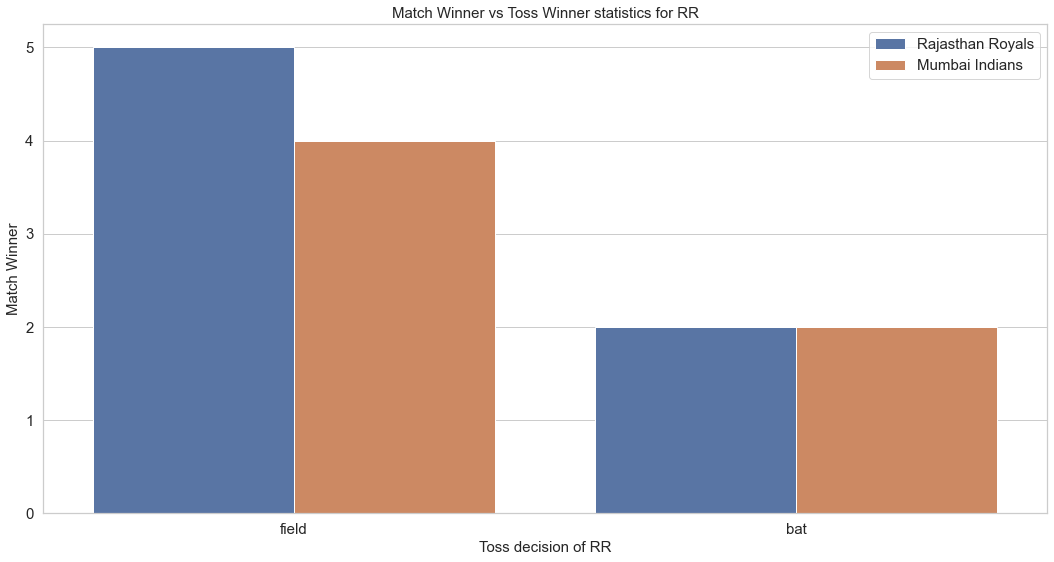

In [24]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(RR['toss_decision'],hue=RR['winner'])
plt.title('Match Winner vs Toss Winner statistics for RR',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of RR',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

In [25]:
player_of_the_match = pd.DataFrame(RM.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
SPD Smith,2
JC Buttler,2
Sohail Tanvir,1
DR Smith,1
KA Pollard,1
YK Pathan,1
CJ Anderson,1
MEK Hussey,1
J Archer,1
A Nehra,1


## Recent Year Performance Analysis

In [26]:
cond2 = RM["season"] == 2018
cond3 = RM["season"] == 2019
final = RM[cond2 | cond3]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7914,2018,Jaipur,22/04/18,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,3,J Archer,Sawai Mansingh Stadium
7940,2018,Mumbai,13/05/18,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,JC Buttler,Wankhede Stadium
11318,2019,Mumbai,13/04/19,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,JC Buttler,Wankhede Stadium
11327,2019,Jaipur,20/04/19,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,5,SPD Smith,Sawai Mansingh Stadium


In [27]:
final.shape

(4, 14)

In [28]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
JC Buttler,2
J Archer,1
SPD Smith,1


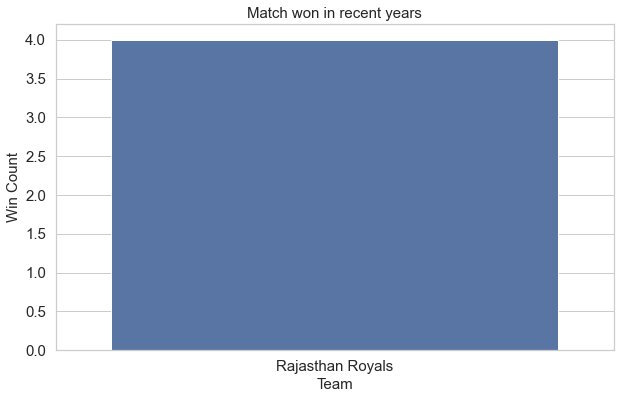

In [29]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)

plt.show()

From all the above analysis and taking in cosideration present form of teams also we can predict that Mumbai Indians will be favorite for this match specifically if the bat first.